Populating the interactive namespace from numpy and matplotlib


/Users/mijiang/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'random', 'power', 'info', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


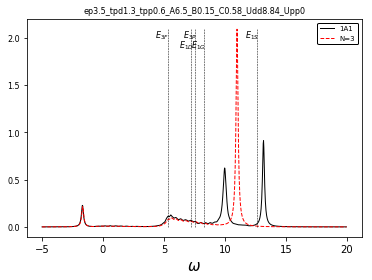

In [2]:
# compare the Aw (1A1 sym) for 3-, 7-orbital models

%pylab inline

import math
import numpy as np
from scipy.sparse.linalg import inv
#from numpy.linalg import inv
import scipy.sparse as sps
import scipy.sparse.linalg
import sys
import matplotlib.pyplot as plt
sys.path.append('../../src/')
from pylab import *

import parameters as pam
import lattice as lat
import variational_space as vs
import hamiltonian as ham
import basis_change as basis
import lanczos

ed = 0
ep = 3.5

tpd = 1.3
tpp = 0.6

pds = 1.5
pdp = 0.7
#pds = 0.00001
#pdp = 0.00001
pps = 1.0
ppp = 0.3

A = 6.5
B = 0.15
C = 0.58
Udd = A+4*B+3*C
Upp = 0

Mc3 = 16
Mc7 = 16

fNorb3 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_Udd'+str(Udd)+'_Upp'+str(Upp)+'_Mc'+str(Mc3)+'_Norb'+str(3)
fNorb7 = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Upp'+str(Upp)+'_Mc'+str(Mc7)+'_Norb'+str(7)
titlename = 'ep'+str(ep)+'_tpd'+str(tpd)+'_tpp'+str(tpp)+ \
            '_A'+str(A)+'_B'+str(B)+'_C'+str(C)+'_Udd'+str(Udd)+'_Upp'+str(Upp)      
    
##########################################################################
# compare w of lowest peak
##########################################################################
Ms = ['-b','-r','-g','-m','-c','-k','-y','--b','--r','--g','--m','--c','--k','--y']

def plot_atomic_multiplet_peaks(maxval):
    yy = [0,maxval]
    xx = [pam.E_1S,pam.E_1S]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    text(pam.E_1S-1, 2.0, '$E_{1S}$', fontsize=8)
    xx = [pam.E_1G,pam.E_1G]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    text(pam.E_1G-1, 1.9, '$E_{1G}$', fontsize=8)
    xx = [pam.E_1D,pam.E_1D]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    text(pam.E_1D-1, 1.9, '$E_{1D}$', fontsize=8)
    xx = [pam.E_3P,pam.E_3P]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    text(pam.E_3P-1, 2.0, '$E_{3P}$', fontsize=8)
    xx = [pam.E_3F,pam.E_3F]
    plt.plot(xx, yy,'--k', linewidth=0.5)
    text(pam.E_3F-1, 2.0, '$E_{3F}$', fontsize=8)
    
Nsym = len(pam.symmetries)
for i in range(0,Nsym):
    sym = pam.symmetries[i]
            
    #subplot(Nsym,1,i+1)
    a = loadtxt('./data_Aw/'+fNorb7+'_'+sym+'.txt',skiprows=1)
    plot(a[:,0], a[:,1], '-k', linewidth=1, label=sym)
    
    if sym=='1A1':
        # plot N=3 result for comparison
        a = loadtxt('./data_Aw/'+fNorb3+'.txt',skiprows=1)
        plot(a[:,0], a[:,1], '--r', linewidth=1, label='N=3')

    maxval = max(a[:,1])
    plot_atomic_multiplet_peaks(maxval)
            
    if i==0:
        title(titlename, fontsize=8)
    if i==Nsym-1:
        xlabel('$\omega$',fontsize=15)

    #xlim([-5,20])
    #xlim([-7.5,13])
    #ylim([0,0.5])
    #ylim([0,maxval])
    plt.yticks(fontsize=8)
    #ylabel('$A(\omega)$',fontsize=17)
    #text(0.45, 0.1, '(a)', fontsize=16)
    #grid('on',linestyle="--", linewidth=0.5, color='black', alpha=0.5)
    legend(loc='best', fontsize=7, framealpha=1.0, edgecolor='black') 
savefig("compare_Aw_Norb_"+titlename+".pdf")